<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_CNN_Own_Data_Martin_explore_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Tasks
In this quest, you will be working on a classic CNN task of classifying cats and dogs images. You can access the training and testing sets [here](https://drive.google.com/drive/folders/19EL9VyYCVqxStG-O1jJtBQGa8JZpLDvO?usp=sharing) and get acquainted with the folder structure.

Make sure to change your Colab runtime to GPU to ensure adequate performance.

Specify 4 directories for cats and dogs images of training and testing sets respectively. You will be using them to build and train the network.

In [ ]:
# mount google drive to access dataset food
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd /content/
# create new local directory, i.e. on the current machine which you are connected to
!mkdir local_data   # could also be another name than local_data

Mounted at /content/drive
/content


In [ ]:
# Prerequisite: Your data must be stored as zip-file on your google cloud drive
# Unzip data into 'local data'
#/content/drive/MyDrive/Copy_Material_AIDA_2021/spec_colabs/w2_s/quest3_cnn_cat_dogs/test_set.zip
#/content/drive/MyDrive/Copy_Material_AIDA_2021/spec_colabs/w2_s/quest3_cnn_cat_dogs/training_set.zip
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/spec_colabs/w2_s/quest3_cnn_cat_dogs/test_set.zip' -d local_data
!unzip '/content/drive/MyDrive/Copy_Material_AIDA_2021/spec_colabs/w2_s/quest3_cnn_cat_dogs/training_set.zip' -d local_data

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: local_data/training_set/cats/cat.3170.jpg  
  inflating: local_data/training_set/dogs/dog.2895.jpg  
  inflating: local_data/training_set/cats/cat.3517.jpg  
  inflating: local_data/training_set/dogs/dog.3487.jpg  
  inflating: local_data/training_set/cats/cat.3242.jpg  
  inflating: local_data/training_set/dogs/dog.3343.jpg  
  inflating: local_data/training_set/dogs/dog.3203.jpg  
  inflating: local_data/training_set/dogs/dog.2763.jpg  
  inflating: local_data/training_set/dogs/dog.3189.jpg  
  inflating: local_data/training_set/cats/cat.3684.jpg  
  inflating: local_data/training_set/dogs/dog.3421.jpg  
  inflating: local_data/training_set/dogs/dog.3527.jpg  
  inflating: local_data/training_set/dogs/dog.3032.jpg  
  inflating: local_data/training_set/cats/cat.316.jpg  
  inflating: local_data/training_set/dogs/dog.287.jpg  
  inflating: local_data/training_set/dogs/dog.2831.jpg  
  inflating: local_data

Initiate `ImageDataGenerator` (check the [documentation](https://keras.io/api/preprocessing/image/)). Your image generator needs to convert the image from RGB into number arrays in order for the neural network to proces them (in other words, normalize the values using the `rescale` parameter).

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255.,validation_split=0.2)
test_gen = ImageDataGenerator(rescale=1./255.)
#train_gen = ImageDataGenerator(validation_split=0.2)
#test_gen = ImageDataGenerator()

Apply the `ImageDataGenerator` you defined above using `flow_from_directory` to convert both training and testing data.

In [ ]:
#/content/local_data/test_set

train_generator = train_gen.flow_from_directory(directory="/content/local_data/training_set",target_size=(224,224),batch_size=64,shuffle=True,seed=42,subset='training')
valid_generator = train_gen.flow_from_directory(directory="/content/local_data/training_set",target_size=(224,224),batch_size=64,shuffle=True,seed=42,subset='validation')
test_generator = test_gen.flow_from_directory(directory="/content/local_data/test_set", target_size=(224,224),batch_size=64,seed=42)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# VGG16

Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

Compile it using the optimizer and error metrics of your choice.

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001) #changed from 0.001
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


# 2 fit and evaluate

In [ ]:
history = model.fit(train_generator,
                    callbacks=[checkpoint,early],
                    #steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    #validation_steps = STEP_SIZE_TEST,
                    epochs=15)

Epoch 1/15
100/100 [==============================] - 135s 873ms/step - loss: 0.6860 - accuracy: 0.5536 - val_loss: 0.6927 - val_accuracy: 0.5138

Epoch 00001: val_accuracy improved from -inf to 0.51375, saving model to vgg16_1.h5
Epoch 2/15
100/100 [==============================] - 94s 920ms/step - loss: 0.6461 - accuracy: 0.6091 - val_loss: 0.6801 - val_accuracy: 0.5275

Epoch 00002: val_accuracy improved from 0.51375 to 0.52750, saving model to vgg16_1.h5
Epoch 3/15
100/100 [==============================] - 91s 905ms/step - loss: 0.5965 - accuracy: 0.6782 - val_loss: 0.7263 - val_accuracy: 0.5013

Epoch 00003: val_accuracy did not improve from 0.52750
Epoch 4/15
100/100 [==============================] - 90s 903ms/step - loss: 0.5633 - accuracy: 0.7178 - val_loss: 0.6713 - val_accuracy: 0.5325

Epoch 00004: val_accuracy improved from 0.52750 to 0.53250, saving model to vgg16_1.h5
Epoch 5/15
100/100 [==============================] - 91s 905ms/step - loss: 0.4943 - accuracy: 0.7721

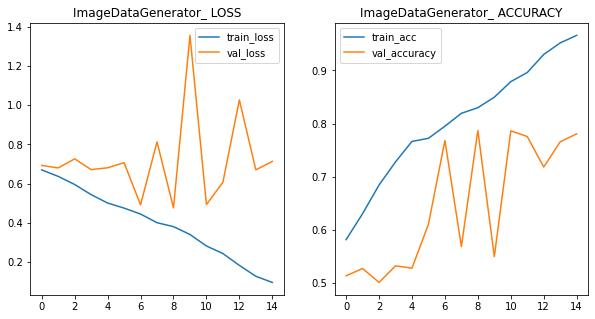

In [ ]:
history_plot_from_loss_acc(history, "ImageDataGenerator")

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 13s 394ms/step - loss: 0.7017 - accuracy: 0.8005


[0.7016630172729492, 0.8004999756813049]

# 1 fit and evaluate

Fit the model using `fit_generator`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

In [ ]:
history = model.fit(train_generator,
                    callbacks=[checkpoint,early],
                    #steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    #validation_steps = STEP_SIZE_TEST,
                    epochs=10)

Epoch 1/20
100/100 [==============================] - 98s 981ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.9565 - val_accuracy: 0.8300

Epoch 00001: val_accuracy improved from 0.81813 to 0.83000, saving model to vgg16_1.h5
Epoch 2/20
100/100 [==============================] - 98s 978ms/step - loss: 0.0092 - accuracy: 0.9961 - val_loss: 1.0414 - val_accuracy: 0.8163

Epoch 00002: val_accuracy did not improve from 0.83000
Epoch 3/20
100/100 [==============================] - 98s 976ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 1.0845 - val_accuracy: 0.7950

Epoch 00003: val_accuracy did not improve from 0.83000
Epoch 4/20
100/100 [==============================] - 98s 978ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 1.3241 - val_accuracy: 0.7631

Epoch 00004: val_accuracy did not improve from 0.83000
Epoch 5/20
100/100 [==============================] - 98s 976ms/step - loss: 0.0375 - accuracy: 0.9870 - val_loss: 1.1839 - val_accuracy: 0.7981

Epoch 00005: val_a

Plot the model accuracy.

In [ ]:
model.evaluate(test_generator)

32/32 [==============================] - 9s 258ms/step - loss: 1.0307 - accuracy: 0.8340


[1.0306892395019531, 0.8339999914169312]

In [ ]:
import matplotlib.pyplot as plt

def history_plot_from_loss_acc(history, title):
  plt.figure(figsize=(10,5))

  train_loss_list = history.history['loss']
  train_accuracy = history.history['accuracy']
  val_loss_list = history.history['val_loss']
  val_accuracy_list = history.history['val_accuracy']
  x = history.epoch
  
  plt.subplot(1,2,1)
  plt.plot(x, train_loss_list)
  plt.plot(x, val_loss_list)
  plt.legend(['train_loss', 'val_loss'])
  plt.title(title+"_ LOSS")
  
  plt.subplot(1,2,2)
  plt.plot(x, train_accuracy)
  plt.plot(x, val_accuracy_list)
  plt.legend(['train_acc','val_accuracy'])
  plt.title(title+"_ ACCURACY")
  plt.show()

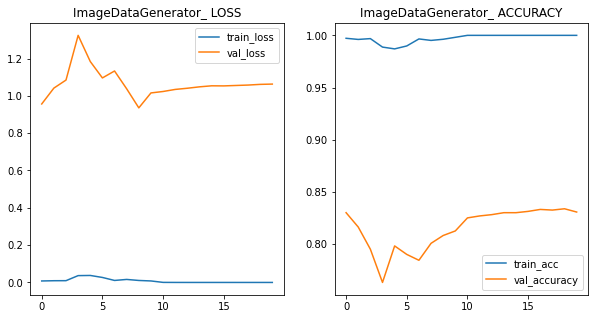

In [ ]:
history_plot_from_loss_acc(history, "ImageDataGenerator")

dog


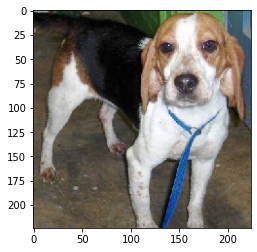

In [ ]:
from keras.preprocessing import image
img = image.load_img("/content/local_data/training_set/dogs/dog.240.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

# VGG16 from Keras

Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [ ]:
import tensorflow. keras as keras
vgg16_model = keras.applications.VGG16()

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16_model.layers

In [ ]:
model_2 = Sequential()
for layer in vgg16_model.layers:
  model_2.add(layer)

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  layer.trainable = False

In [ ]:
model_2.add(Dense(2,activation='softmax'))

In [ ]:
model_2.compile(optimizer=Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_generator,validation_data = valid_generator,epochs=50)        

Epoch 1/50
100/100 [==============================] - 36s 356ms/step - loss: 0.6988 - accuracy: 0.5000 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 36s 355ms/step - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 3/50
100/100 [==============================] - 35s 353ms/step - loss: 0.6969 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 4/50
100/100 [==============================] - 35s 354ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 5/50
100/100 [==============================] - 35s 353ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 6/50
100/100 [==============================] - 35s 354ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 7/50
100/100 [==============================] - 35s 354ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6945 - val_ac

Plot the model accuracy.

In [ ]:
model_2.evaluate(test_generator)

32/32 [==============================] - 9s 269ms/step - loss: 0.6932 - accuracy: 0.5015


[0.6931511163711548, 0.5015000104904175]

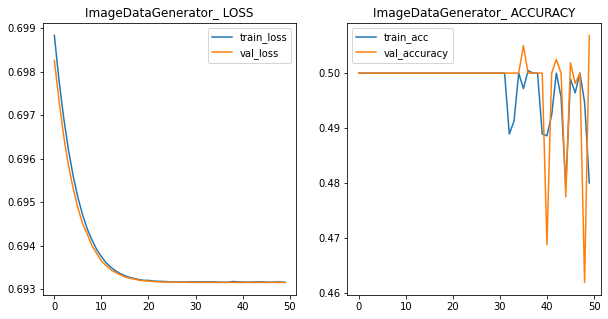

In [ ]:
history_plot_from_loss_acc(history_2, "ImageDataGenerator")

# TODO model from LC

Build a convolutional neural network based on the [VGG16](https://neurohive.io/en/popular-networks/vgg16/) architecture.

In [ ]:
learning_rate = 0.001
dec_rate = 0 #1/4353 * 0.2 
optim = Adam(lr=learning_rate, decay=dec_rate)

model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), padding='valid',activation='relu', input_shape=(28,28,1)))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(64,(3,3), padding='valid',activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128,(3,3), padding='valid',activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(10,activation='softmax'))
model_2.summary()

Compile it using the optimizer and error metrics of your choice.

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit the model using `fit_generator`. This time, feel free to define the parameters according to your understanding and experiment with them to find a better solution. Be patient though, the training will take a while.

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
STEP_SIZE_TRAIN,STEP_SIZE_VALID,STEP_SIZE_TEST

In [ ]:
history_2 = model_2.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = valid_generator,
                    validation_steps = STEP_SIZE_TEST,
                    epochs=10)
                    

Plot the model accuracy.

In [ ]:
model_2.evaluate(test_generator)

In [ ]:
history_plot_from_loss_acc(history_2, "ImageDataGenerator")